In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Input, BatchNormalization
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16

import numpy as np


print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


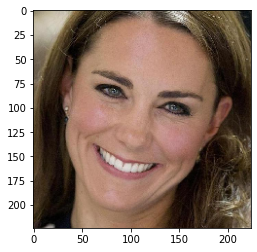

In [2]:
def get_image(filename):
  
    image = load_img(filename, target_size=(224, 224))
    np_image = img_to_array(image)
    return np_image


import matplotlib.pyplot as plt
%matplotlib inline

image = get_image('./Affectnet/train_class/class002/image0000089.jpg')
plt.imshow(np.uint8(image))
plt.show()

In [3]:
train_data_gen= ImageDataGenerator(rotation_range=10,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        rescale=1./255,
        #shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        ) # change to biliear
validation_data_gen=ImageDataGenerator(rescale=1./255)

# train and validation directory
train_dir="./affectnet/train_class/"
val_dir="./affectnet/val_class"

bs=64
cm="categorical"

train_gen=train_data_gen.flow_from_directory(train_dir,target_size=(224,224),batch_size=bs,class_mode=cm)
val_gen=validation_data_gen.flow_from_directory(val_dir,target_size=(224,224),batch_size=bs,class_mode=cm)

Found 15000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [19]:
loaded_1 = keras.models.load_model(
   "densenet_default_no_initializer_0.001"
)


In [20]:
predictions=loaded_1.predict(val_gen,steps=1500//64,verbose=1)



23/23 [==============================] - 7s 286ms/step


In [21]:
predictions[1]

array([8.0839783e-04, 9.9882096e-01, 3.7060652e-04], dtype=float32)

In [22]:
predictions.shape

(1472, 3)

In [44]:
print(type(predictions), type(predictions[1]))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [23]:
true_label=np.zeros((1472,3))
print(true_label[1].shape)

(3,)


In [24]:

test_labels = []

for i in range(0,int(1500//64)):
    test_labels.extend(np.array(val_gen[i][1]))

In [22]:
test_labels[0]



array([0., 0., 1.], dtype=float32)

In [25]:
true_label=np.zeros((1472,3))
for i in range(1472):
    true_label[i]=test_labels[i]
print(true_label.shape, test_labels[1].shape, true_label[1])

(1472, 3) (3,) [0. 1. 0.]


In [26]:
for i in range(5):
    print(true_label[i])
# print(true_label[64])

[0. 0. 1.]
[0. 1. 0.]
[0. 1. 0.]
[0. 1. 0.]
[1. 0. 0.]


In [27]:
#sanity check
x,y= val_gen[0]
# print(y)

In [28]:
true_label_=true_label
predictions_=predictions
true_label.shape

(1472, 3)

In [29]:
i=0
y_true=[]
y_pred=[]
while i!=1472:
    y_true.append(np.argmax(true_label_[i]))
    y_pred.append(np.argmax(predictions_[i]))
    i=i+1
print(len(y_true), len(y_pred))

1472 1472


In [16]:
print(y_true[:10])
print(y_pred[:10])

[2, 0, 2, 0, 2, 0, 0, 0, 0, 2]
[2, 0, 2, 1, 2, 0, 0, 0, 0, 2]


In [30]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

print(classification_report(y_true, y_pred, target_names=val_gen.class_indices))
         

              precision    recall  f1-score   support

    class001       0.71      0.54      0.61       482
    class002       0.86      0.85      0.86       495
    class003       0.67      0.83      0.74       495

    accuracy                           0.74      1472
   macro avg       0.75      0.74      0.74      1472
weighted avg       0.75      0.74      0.74      1472



In [58]:
print(val_gen.classes.shape)
print(y_pred.shape)

(1500,)
(1472,)


In [77]:
loaded_1 = keras.models.load_model(
   "model_he_normal.h5")
predictions=loaded_1.predict(val_gen,steps=1500//64,verbose=1)

predictions.shape


23/23 [==============================] - 10s 444ms/step


(1472, 3)

In [78]:

test_labels = []

for i in range(0,int(1500//64)):
    test_labels.extend(np.array(val_gen[i][1]))

    true_label=np.zeros((1472,3))
for i in range(1472):
    true_label[i]=test_labels[i]
print(true_label.shape, test_labels[1].shape, true_label[1])    
for i in range(5):
    print(true_label[i])
# print(true_label[64])

(1472, 3) (3,) [0. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 0.]
[1. 0. 0.]
[0. 1. 0.]


In [79]:
true_label_=true_label
predictions_=predictions
true_label.shape
i=0
y_true=[]
y_pred=[]
while i!=1472:
    y_true.append(np.argmax(true_label_[i]))
    y_pred.append(np.argmax(predictions_[i]))
    i=i+1
print(len(y_true), len(y_pred))

1472 1472


In [80]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

print(classification_report(y_true, y_pred, target_names=val_gen.class_indices))
         

              precision    recall  f1-score   support

    class001       0.67      0.81      0.74       494
    class002       0.94      0.84      0.89       486
    class003       0.80      0.71      0.76       492

    accuracy                           0.79      1472
   macro avg       0.80      0.79      0.79      1472
weighted avg       0.80      0.79      0.79      1472



Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

    class001       0.34      0.32      0.33       500
    class002       0.35      0.28      0.31       500
    class003       0.32      0.41      0.36       472

    accuracy                           0.33      1472
   macro avg       0.34      0.34      0.33      1472
weighted avg       0.34      0.33      0.33      1472



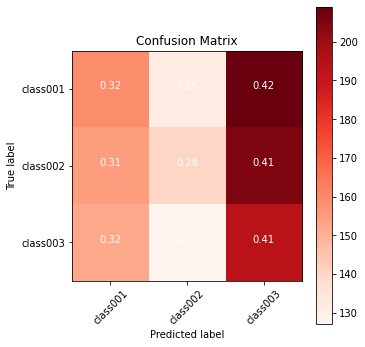

In [18]:
#Plot the confusion matrix. Set Normalize = True/False
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    plt.figure(figsize=(5,5))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Print the Target names

#shuffle=False

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

# print(target_names)

#Confution Matrix 

# Y_pred = model.predict_generator(val_gen)
Y_pred = predictions
y_pred = np.argmax(Y_pred, axis=-1)
print('Confusion Matrix')
cm = confusion_matrix(val_gen.classes[:1472], y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(val_gen.classes[:1472], y_pred, target_names=target_names))

In [118]:
from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_pred,val_gen.classes[:1472])
# print(cm)
print(confusion_matrix(val_gen.classes[:1472], y_pred))
target_names = ['class1', 'class2', 'class3']
print(classification_report(val_gen.classes[:1472], y_pred, target_names=target_names))

[[203 141 156]
 [196 158 146]
 [199 138 135]]
              precision    recall  f1-score   support

      class1       0.34      0.41      0.37       500
      class2       0.36      0.32      0.34       500
      class3       0.31      0.29      0.30       472

    accuracy                           0.34      1472
   macro avg       0.34      0.34      0.33      1472
weighted avg       0.34      0.34      0.34      1472



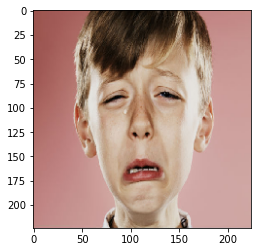

[[0.00162564 0.99837434 0.        ]]
1


In [17]:

#0: neutral , 1:happy, 2: sad
filename="/home/parth17/sad.jpg"
image = load_img(filename, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
plt.imshow(np.uint8(image))
plt.show()
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))


# predict the probability across all output classes
yhat = model.predict(image)
print(yhat)

print(np.argmax(yhat))

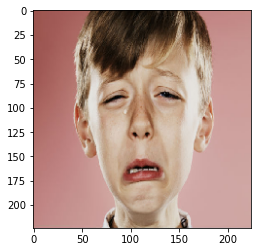

[[0.00162564 0.99837434 0.        ]]
1


In [18]:
#0: neutral , 1:happy, 2: sad
filename="/home/parth17/sad.jpg"
image = load_img(filename, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
plt.imshow(np.uint8(image))
plt.show()
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))


# predict the probability across all output classes
yhat = model.predict(image)
print(yhat)

print(np.argmax(yhat))